In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # window용
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False 
# matplotlib.rcParams['font.family'] = 'AppleGothic'   # Mac용

In [4]:
df = pd.read_csv('drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [5]:
df['total_servings']=df['beer_servings']+df['spirit_servings']+df['wine_servings']

In [6]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [9]:
df.shape

(193, 7)

In [19]:
df['continent'].fillna('OT',inplace=True)

C:\Users\KOSMO\AppData\Local\Temp\ipykernel_7664\2783539971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('OT',inplace=True)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
 6   total_servings                193 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 10.7+ KB


In [21]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [26]:
c_df = df.groupby('continent')['total_servings'].sum()
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: count, dtype: int64

In [29]:
c_df.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

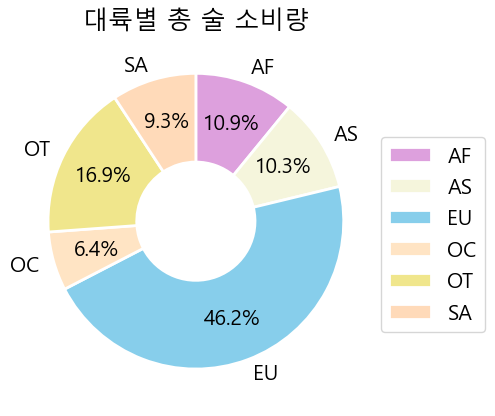

In [42]:
wedgeprops = {'width':0.6,'edgecolor':'white','linewidth':2}   # 중간공백
plt.title('대륙별 총 술 소비량')
colors = ['plum','beige','skyblue','bisque','khaki','peachpuff']
plt.pie(c_df,labels=c_df.index,colors=colors,autopct='%.1f%%',pctdistance=0.7,wedgeprops=wedgeprops\
        ,counterclock=False,startangle=90)

plt.legend(loc=(1,0.2))
plt.show()

In [82]:
## 전체 평균보다 많은 알코올 도수를 섭취하는 대륙
data = df['total_litres_of_pure_alcohol'].mean()

In [70]:
total = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
total

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [ ]:
filt = (df.groupby('continent')['total_litres_of_pure_alcohol'].mean()) >= (df['total_litres_of_pure_alcohol'].mean())
filt

# 필터 적용
df.groupby('continent')['total_litres_of_pure_alcohol'].mean()[filt]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [64]:
# 대륙별 beer_sevings 높은 순으로 출력
df.groupby('continent')['beer_servings'].mean().sort_values(ascending=False)


continent
EU    193.777778
SA    175.083333
OT    145.434783
OC     89.687500
AF     61.471698
AS     37.045455
Name: beer_servings, dtype: float64

In [ ]:
df.groupby('continent')['beer_servings'].mean()   # index의 해당되는 value값
df.groupby('continent')['beer_servings'].mean().idxmax()   # index가 출력

'EU'

In [84]:
total.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean'], dtype='object', name='continent')

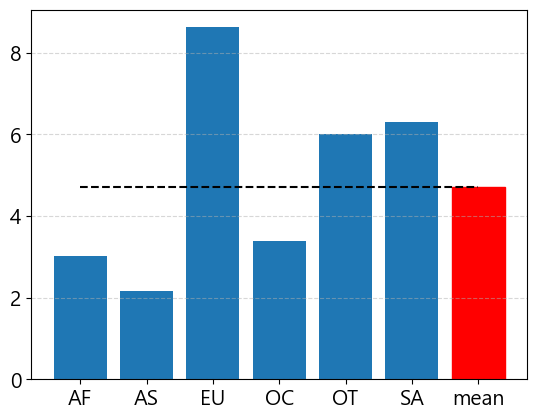

In [105]:
con_bar = plt.bar(total.index,list(total))
plt.grid(axis='y',ls='--',alpha=0.5)   # 격자선
x = total.index
y = [data]*7
plt.plot(x,y,color='black',ls='--')
# plt.bar(total.index,list(total))[len(total)-1].set_color('red')
con_bar[len(total)-1].set_color('red')
total['mean'] = data
# for i in range(7):
#   plt.text(total[i],list(total)[i],list(total)[i],ha='center')
plt.show()

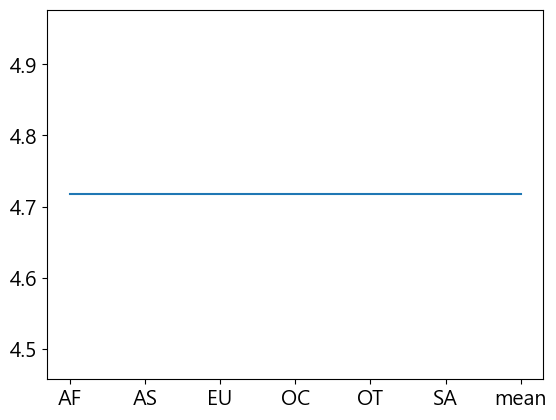